In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ct_data/ACSDP5YSPT2010.DP03-Data.csv",skiprows=[1], low_memory=False)

In [3]:
col_names = pd.Series(df.columns)
useful_idx = ["GEO_ID"]
useful_idx.extend(col_names[col_names.apply(lambda x: x[-1]=="E")])
for metric in useful_idx:
    if df[metric][0] == '(X)' and len(np.unique(df[metric])) == 1:
        useful_idx.remove(metric)

In [4]:
useful_idx

['GEO_ID',
 'NAME',
 'DP03_0001E',
 'DP03_0001PE',
 'DP03_0002E',
 'DP03_0002PE',
 'DP03_0003E',
 'DP03_0003PE',
 'DP03_0004E',
 'DP03_0004PE',
 'DP03_0005E',
 'DP03_0005PE',
 'DP03_0006E',
 'DP03_0006PE',
 'DP03_0007E',
 'DP03_0007PE',
 'DP03_0008E',
 'DP03_0008PE',
 'DP03_0009PE',
 'DP03_0010E',
 'DP03_0010PE',
 'DP03_0011E',
 'DP03_0011PE',
 'DP03_0012E',
 'DP03_0012PE',
 'DP03_0013E',
 'DP03_0013PE',
 'DP03_0014E',
 'DP03_0014PE',
 'DP03_0015E',
 'DP03_0015PE',
 'DP03_0016E',
 'DP03_0016PE',
 'DP03_0017E',
 'DP03_0017PE',
 'DP03_0018E',
 'DP03_0018PE',
 'DP03_0019E',
 'DP03_0019PE',
 'DP03_0020E',
 'DP03_0020PE',
 'DP03_0021E',
 'DP03_0021PE',
 'DP03_0022E',
 'DP03_0022PE',
 'DP03_0023E',
 'DP03_0023PE',
 'DP03_0024E',
 'DP03_0024PE',
 'DP03_0025E',
 'DP03_0026E',
 'DP03_0026PE',
 'DP03_0027E',
 'DP03_0027PE',
 'DP03_0028E',
 'DP03_0028PE',
 'DP03_0029E',
 'DP03_0029PE',
 'DP03_0030E',
 'DP03_0030PE',
 'DP03_0031E',
 'DP03_0031PE',
 'DP03_0032E',
 'DP03_0032PE',
 'DP03_0033E',
 'DP

In [5]:
df = df[useful_idx]

In [6]:
df["GEO_ID"] = df["GEO_ID"].apply(lambda x:x[-11:])

In [7]:
df

,GEO_ID,NAME,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,3.6,4.2,4.2,2.1,4.8,3.5,5.3,0.0,2.4,12.2
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,12.7,18.1,17.6,11.4,19.7,11.4,12.7,7.1,9.2,27.6
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,13.8,33.2,30.6,23.1,32.5,10.4,12.7,4.9,12.2,20.6
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,18.3,26.4,26.4,42.4,18.1,16.3,18.8,9.4,14.3,30.4
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,9.4,13.3,13.3,50.0,8.3,8.7,10.0,6.3,5.8,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,5.1,1.5,1.5,0.0,1.9,5.9,3.5,12.0,1.6,17.3
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,7.6,13.8,12.0,4.6,14.2,5.7,5.7,5.8,6.5,11.9
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,1.1,1.5,0.0,0.0,0.0,0.9,0.8,1.8,0.0,10.3
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,3.8,0.9,0.9,0.0,1.1,4.7,3.1,11.3,2.9,10.5


In [8]:
geo = gpd.read_file("zip://ct_data/tl_2022_55_tract.zip")

In [9]:
joined = gpd.GeoDataFrame(pd.merge(df,geo,how="left",left_on="GEO_ID",right_on = "GEOID"))

In [10]:
joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801.0,17547549.0,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,109489823.0,7642078.0,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,236242985.0,1195071.0,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019362.0,19754029.0,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,11950868.0,1427548.0,+44.3643984,-089.8373218,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11766000.0,427539.0,+44.3673095,-089.8033856,"POLYGON ((-89.81735 44.38055, -89.81721 44.380..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33496886.0,502121.0,+44.3654643,-089.7591255,"POLYGON ((-89.80180 44.35869, -89.80167 44.359..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128690321.0,4282187.0,+44.2849618,-089.7980036,"POLYGON ((-89.91292 44.27257, -89.91287 44.272..."


<AxesSubplot:>

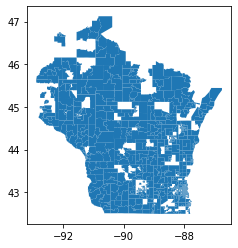

In [11]:
joined[joined["geometry"].notnull()].plot()

In [12]:
joined[joined["geometry"].isnull()]

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
19,55005000600,"Census Tract 6, Barron County, Wisconsin",5187,5187,3113,60.0,3113,60.0,2822,54.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23,55005001002,"Census Tract 10.02, Barron County, Wisconsin",4429,4429,2618,59.1,2618,59.1,2415,54.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
27,55007960400,"Census Tract 9604, Bayfield County, Wisconsin",3974,3974,2480,62.4,2480,62.4,2348,59.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
61,55009020503,"Census Tract 205.03, Brown County, Wisconsin",5890,5890,4525,76.8,4514,76.6,4282,72.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,55137960200,"Census Tract 9602, Waushara County, Wisconsin",3694,3694,2127,57.6,2127,57.6,1992,53.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1338,55139000500,"Census Tract 5, Winnebago County, Wisconsin",4922,4922,3813,77.5,3813,77.5,3474,70.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1354,55139002000,"Census Tract 20, Winnebago County, Wisconsin",5426,5426,3852,71.0,3852,71.0,3654,67.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1359,55139002400,"Census Tract 24, Winnebago County, Wisconsin",7616,7616,5777,75.9,5763,75.7,5627,73.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [13]:
joined2 = pd.merge(geo,df,how="left",left_on="GEOID",right_on = "GEO_ID")

<AxesSubplot:>

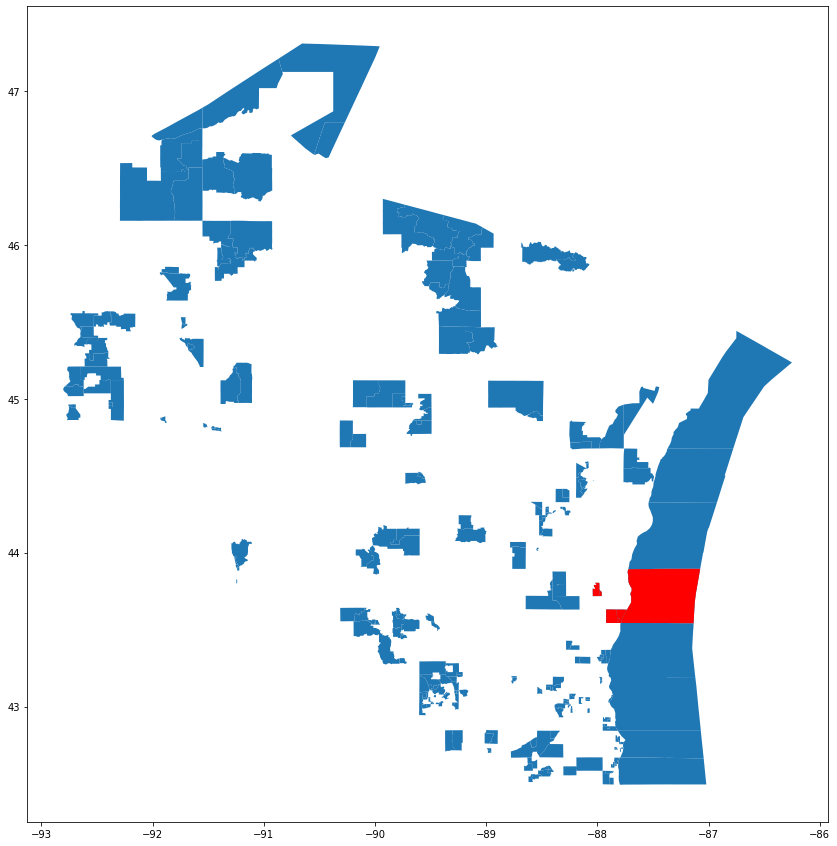

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
joined2[joined2["DP03_0133PE"].isnull()].plot(ax=ax)
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())].plot(color="red",ax=ax)

In [15]:
not_joined_attr = joined[(joined["geometry"].isnull())]
not_joined_geo = joined2[(joined2["DP03_0133PE"].isnull())]

In [16]:
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())][:-1]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
10,55,117,010504,55117010504,105.04,Census Tract 105.04,G5020,S,38350718,219284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,55,117,011302,55117011302,113.02,Census Tract 113.02,G5020,S,77506338,591219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,55,117,010503,55117010503,105.03,Census Tract 105.03,G5020,S,6338369,218145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,55,117,011301,55117011301,113.01,Census Tract 113.01,G5020,S,38168257,6649974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
joined[(joined["GEO_ID"].str.startswith("55117")) & (joined["geometry"].isnull())]

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1136,55117010501,"Census Tract 105.01, Sheboygan County, Wisconsin",5881,5881,4239,72.1,4239,72.1,3911,66.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1146,55117011300,"Census Tract 113, Sheboygan County, Wisconsin",5449,5449,4011,73.6,4001,73.4,3846,70.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


<AxesSubplot:>

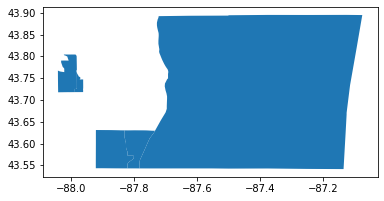

In [18]:
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())].plot()

In [19]:
geo['geometry']

0       POLYGON ((-88.15018 44.51202, -88.15010 44.513...
1       POLYGON ((-87.99468 44.48806, -87.99463 44.488...
2       POLYGON ((-87.95519 44.51945, -87.95512 44.519...
3       POLYGON ((-88.00750 44.53416, -88.00528 44.538...
4       POLYGON ((-92.55310 45.94872, -92.55302 45.948...
                              ...                        
1537    POLYGON ((-90.65769 43.05224, -90.65765 43.052...
1538    POLYGON ((-91.07932 42.82298, -91.07897 42.825...
1539    POLYGON ((-90.69007 42.60893, -90.68964 42.609...
1540    POLYGON ((-90.82488 42.78242, -90.82475 42.782...
1541    POLYGON ((-90.02638 44.08721, -90.02627 44.089...
Name: geometry, Length: 1542, dtype: geometry

In [20]:
geo

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55,009,940002,55009940002,9400.02,Census Tract 9400.02,G5020,S,11531694,0,+44.5157530,-088.1259731,"POLYGON ((-88.15018 44.51202, -88.15010 44.513..."
1,55,009,001600,55009001600,16,Census Tract 16,G5020,S,3538241,8847,+44.4885958,-087.9835008,"POLYGON ((-87.99468 44.48806, -87.99463 44.488..."
2,55,009,001801,55009001801,18.01,Census Tract 18.01,G5020,S,11713129,34950,+44.5146596,-087.9165411,"POLYGON ((-87.95519 44.51945, -87.95512 44.519..."
3,55,009,001802,55009001802,18.02,Census Tract 18.02,G5020,S,20140123,20678230,+44.5256892,-087.9732410,"POLYGON ((-88.00750 44.53416, -88.00528 44.538..."
4,55,013,970700,55013970700,9707,Census Tract 9707,G5020,S,279301854,28103929,+45.8803599,-092.3950567,"POLYGON ((-92.55310 45.94872, -92.55302 45.948..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751532,3687082,+43.0851304,-090.5338688,"POLYGON ((-90.65769 43.05224, -90.65765 43.052..."
1538,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569067967,31187513,+42.8066244,-090.8677346,"POLYGON ((-91.07932 42.82298, -91.07897 42.825..."
1539,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421247,10418252,+42.6224241,-090.5534011,"POLYGON ((-90.69007 42.60893, -90.68964 42.609..."
1540,55,043,960600,55043960600,9606,Census Tract 9606,G5020,S,495955434,40951,+42.8491345,-090.5857485,"POLYGON ((-90.82488 42.78242, -90.82475 42.782..."


In [21]:
prev = joined[joined["geometry"].notnull()]

In [22]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import libpysal.weights as weights
import libpysal

In [23]:
kd = libpysal.cg.KDTree(np.array(prev[["INTPTLAT","INTPTLON"]].values))
wnn = libpysal.weights.KNN(kd, 3)
nearest_pt = pd.DataFrame().from_dict(wnn.neighbors, orient="index")
for i in range(nearest_pt.shape[1]):
    nearest_pt = nearest_pt.rename({i:f"n_pt_{i}"}, axis=1)
nearest_pt.head(1)
print(nearest_pt)



      n_pt_0  n_pt_1  n_pt_2
0       1263    1262    1261
1          3       2     368
2          4       1       3
3          1     368       4
4          2       5       3
...      ...     ...     ...
1260    1261    1259    1262
1261    1260    1262    1257
1262    1261    1257    1260
1263    1261    1260    1262
1264    1259    1260    1256

[1265 rows x 3 columns]


/home/yizhou/.local/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [24]:
prev

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801.0,17547549.0,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,109489823.0,7642078.0,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,236242985.0,1195071.0,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019362.0,19754029.0,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
5,55001950502,"Census Tract 9505.02, Adams County, Wisconsin",3537,3537,1356,38.3,1353,38.3,1254,35.5,...,55001950502,9505.02,Census Tract 9505.02,G5020,S,249556185.0,3145969.0,+43.8227785,-089.7494816,"POLYGON ((-89.91343 43.81842, -89.91265 43.818..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,11950868.0,1427548.0,+44.3643984,-089.8373218,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11766000.0,427539.0,+44.3673095,-089.8033856,"POLYGON ((-89.81735 44.38055, -89.81721 44.380..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33496886.0,502121.0,+44.3654643,-089.7591255,"POLYGON ((-89.80180 44.35869, -89.80167 44.359..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128690321.0,4282187.0,+44.2849618,-089.7980036,"POLYGON ((-89.91292 44.27257, -89.91287 44.272..."


In [25]:

prev.reset_index(inplace=True)

In [26]:
prev

,index,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,...,55001950100,9501,Census Tract 9501,G5020,S,233951801.0,17547549.0,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,109489823.0,7642078.0,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,...,55001950400,9504,Census Tract 9504,G5020,S,236242985.0,1195071.0,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
3,4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019362.0,19754029.0,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
4,5,55001950502,"Census Tract 9505.02, Adams County, Wisconsin",3537,3537,1356,38.3,1353,38.3,1254,...,55001950502,9505.02,Census Tract 9505.02,G5020,S,249556185.0,3145969.0,+43.8227785,-089.7494816,"POLYGON ((-89.91343 43.81842, -89.91265 43.818..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,...,55141011300,113,Census Tract 113,G5020,S,11950868.0,1427548.0,+44.3643984,-089.8373218,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1261,1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,...,55141011400,114,Census Tract 114,G5020,S,11766000.0,427539.0,+44.3673095,-089.8033856,"POLYGON ((-89.81735 44.38055, -89.81721 44.380..."
1262,1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,...,55141011500,115,Census Tract 115,G5020,S,33496886.0,502121.0,+44.3654643,-089.7591255,"POLYGON ((-89.80180 44.35869, -89.80167 44.359..."
1263,1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,...,55141011600,116,Census Tract 116,G5020,S,128690321.0,4282187.0,+44.2849618,-089.7980036,"POLYGON ((-89.91292 44.27257, -89.91287 44.272..."


In [27]:

prev = prev.join(nearest_pt)
prev.head(1)
prev


,index,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,...,G5020,S,233951801.0,17547549.0,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194...",1263,1262,1261
1,1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,...,G5020,S,109489823.0,7642078.0,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048...",3,2,368
2,3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,...,G5020,S,236242985.0,1195071.0,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966...",4,1,3
3,4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,...,G5020,S,114019362.0,19754029.0,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913...",1,368,4
4,5,55001950502,"Census Tract 9505.02, Adams County, Wisconsin",3537,3537,1356,38.3,1353,38.3,1254,...,G5020,S,249556185.0,3145969.0,+43.8227785,-089.7494816,"POLYGON ((-89.91343 43.81842, -89.91265 43.818...",2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,...,G5020,S,11950868.0,1427548.0,+44.3643984,-089.8373218,"POLYGON ((-89.85937 44.36194, -89.85928 44.362...",1261,1259,1262
1261,1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,...,G5020,S,11766000.0,427539.0,+44.3673095,-089.8033856,"POLYGON ((-89.81735 44.38055, -89.81721 44.380...",1260,1262,1257
1262,1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,...,G5020,S,33496886.0,502121.0,+44.3654643,-089.7591255,"POLYGON ((-89.80180 44.35869, -89.80167 44.359...",1261,1257,1260
1263,1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,...,G5020,S,128690321.0,4282187.0,+44.2849618,-089.7980036,"POLYGON ((-89.91292 44.27257, -89.91287 44.272...",1261,1260,1262


In [28]:
prev[["DP03_0001E", "DP03_0001PE", 
                "DP03_0002E", 
                "DP03_0002PE", "DP03_0003E", 
                "n_pt_0", "n_pt_1", "n_pt_2"
               ]].to_csv(r'synthetic_data.txt', header=None, index=True, sep=',')

In [29]:

synthetic_data_input = pd.read_table(r'synthetic_data.txt', sep=',', names=["id","DP03_0001E", "DP03_0001PE", 
                "DP03_0002E", 
                "DP03_0002PE", "DP03_0003E", 
                "n_pt_0", "n_pt_1", "n_pt_2"
               ])
synthetic_data_input = synthetic_data_input.set_index("id")
synthetic_data_input.head(1)



# w_voronoi = weights.Voronoi.from_dataframe(prev)

,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,n_pt_0,n_pt_1,n_pt_2
id,,,,,,,,
0,2631,2631,1249,47.5,1249,1263,1262,1261


In [30]:
prev[["DP03_0001E", "DP03_0001PE", 
                "DP03_0002E", 
                "DP03_0002PE", "DP03_0003E"]] = synthetic_data_input[["DP03_0001E", "DP03_0001PE", 
                "DP03_0002E", 
                "DP03_0002PE", "DP03_0003E"]]
prev.head(1)

,index,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,...,G5020,S,233951801.0,17547549.0,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194...",1263,1262,1261


In [31]:
# w_voronoi = weights.Voronoi.from_dataframe(prev)

In [32]:
!rm -rf result_synthetic_data.txt
!python3 STICC_main.py --fname=synthetic_data.txt --oname=result_synthetic_data.txt --attr_idx_start=1 \
--attr_idx_end=5 --spatial_idx_start=6 --spatial_idx_end=8 \
--spatial_radius=3 --number_of_clusters 7 --lambda_parameter 0.01 --beta 3 --maxIters 20 

lam_sparse 0.01
switch_penalty 3.0
num_cluster 7
num stacked 3
completed getting the data
5 (1265, 5) (1265, 3)



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
OPTIMIZATION for Cluster # 5 DONE!!!
OPTIMIZATION for Cluster # 6 DONE!!!
length of the cluster  0 ------> 94
length of the cluster  1 ------> 180
length of the cluster  2 ------> 244
length of the cluster  3 ------> 117
length of the cluster  4 ------> 215
length of the cluster  5 ------> 208
length of the cluster  6 ------> 207
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 86
length of cluster # 1 --------> 200
length of cluster # 2 --------> 256
length of cluster # 3 --------> 101
length of cluster # 4 --------> 183
length of cluster # 5 --------> 203
length of cluster # 6 --------> 236







ITERATION ### 1
OPTIMIZATION fo

length of cluster # 0 --------> 98
length of cluster # 1 --------> 143
length of cluster # 2 --------> 192
length of cluster # 3 --------> 90
length of cluster # 4 --------> 520
length of cluster # 5 --------> 24
length of cluster # 6 --------> 198







ITERATION ### 10
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
OPTIMIZATION for Cluster # 5 DONE!!!
OPTIMIZATION for Cluster # 6 DONE!!!
length of the cluster  0 ------> 98
length of the cluster  1 ------> 143
length of the cluster  2 ------> 192
length of the cluster  3 ------> 90
length of the cluster  4 ------> 520
length of the cluster  5 ------> 24
length of the cluster  6 ------> 198
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 103
length of cluster # 1 --------> 152
length of cluster # 2 --------> 196
length of cluster # 3 --------> 94
length

length of cluster # 0 --------> 79
length of cluster # 1 --------> 85
length of cluster # 2 --------> 226
length of cluster # 3 --------> 84
length of cluster # 4 --------> 398
length of cluster # 5 --------> 58
length of cluster # 6 --------> 335




[1.0000 3.0000 3.0000 ... 5.0000 3.0000 3.0000]
